https://huggingface.co/sentence-transformers/clip-ViT-B-32-multilingual-v1

In [ ]:
#!pip install -U sentence-transformers

In [15]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image, ImageFile
import requests
import torch

In [16]:
# We use the original clip-ViT-B-32 for encoding images
img_model = SentenceTransformer('clip-ViT-B-32')

# Our text embedding model is aligned to the img_model and maps 50+
# languages to the same vector space
text_model = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')


ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [17]:
# Now we load and encode the images
def load_image(url_or_path):
    if url_or_path.startswith("http://") or url_or_path.startswith("https://"):
        return Image.open(requests.get(url_or_path, stream=True).raw)
    else:
        return Image.open(url_or_path)

In [18]:
# We load 3 images. You can either pass URLs or
# a path on your disc
img_paths = [
    # Dog image
    "https://unsplash.com/photos/QtxgNsmJQSs/download?ixid=MnwxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjM1ODQ0MjY3&w=640",

    # Cat image
    "https://unsplash.com/photos/9UUoGaaHtNE/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8Mnx8Y2F0fHwwfHx8fDE2MzU4NDI1ODQ&w=640",

    # Beach image
    "https://unsplash.com/photos/Siuwr3uCir0/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8NHx8YmVhY2h8fDB8fHx8MTYzNTg0MjYzMg&w=640"
]

images = [load_image(img) for img in img_paths]

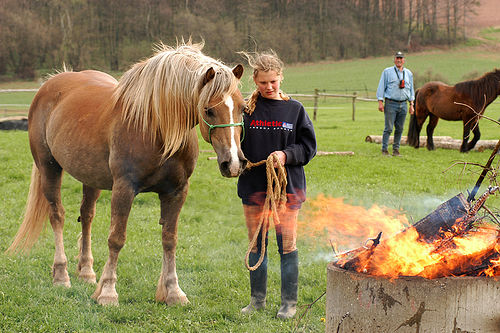

In [19]:
images.append(Image.open(r"10815824_2997e03d76.jpg"))
images[3]

In [20]:
type(images[0])

PIL.JpegImagePlugin.JpegImageFile

In [21]:
# Map images to the vector space
img_embeddings = img_model.encode(images)

In [22]:
img_embeddings.shape

(4, 512)

In [23]:
# Now we encode our text:
texts = [
    "A dog in the snow",
    "Eine Katze",  # German: A cat
    "Una playa con palmeras.",  # Spanish: a beach with palm trees
    "Egy lány a lovával"
]

text_embeddings = text_model.encode(texts)
text_embeddings.shape

(4, 512)

In [25]:
# Compute cosine similarities:
cos_sim = util.cos_sim(text_embeddings, img_embeddings)

for text, scores in zip(texts, cos_sim):
    max_img_idx = torch.argmax(scores)
    print("Text:", text)
    print("Score:", scores[max_img_idx] )
    #print("Path:", img_paths[max_img_idx], "\n")
    print()

Text: A dog in the snow
Score: tensor(0.3144)

Text: Eine Katze
Score: tensor(0.2675)

Text: Una playa con palmeras.
Score: tensor(0.3016)

Text: Egy lány a lovával
Score: tensor(0.2816)

